In [20]:
import warnings

In [21]:
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [22]:
%load_ext load_style
%load_style talk.css

The load_style extension is already loaded. To reload it, use:
  %reload_ext load_style


# Interactive visualisations in the browser with Python

by [Nicolas Fauchereau](mailto:Nicolas.Fauchereau@gmail.com)

In the past few years, the python (scientific) ecosystem has seen intense development of solutions aimed at bringing interactive data visualisation in the browser, through a set of libraries which basically interface with powerful JavaScript visualisations libraries such as `D3.js`, `leaflet.js` etc. 

In this demo we will see: 

+ [MPLd3](http://mpld3.github.io/)
+ [bokeh](http://bokeh.pydata.org/)
+ [folium](https://github.com/wrobstory/folium)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
%matplotlib inline

<hr size=6>

## MPLD3

[MPLd3](http://mpld3.github.io/) is developed by [Jake VanderPlas](http://www.astro.washington.edu/users/vanderplas/)  

MPLD3 provides a simple API for exporting [matplotlib](http://matplotlib.org) graphics to HTML code which can be used within the browser, within standard web pages, blogs, or tools such as the IPython notebook.

[MPLd3](http://mpld3.github.io/) can be installed via: 
    
```
$ conda install mpld3
```

if you are using the [Anaconda Python distribution](https://www.continuum.io/downloads) (**strongly** recommended)

or 

```
$ pip install mpld3
```

if you are using e.g. your system's python

In [25]:
import mpld3
from mpld3 import plugins
mpld3.enable_notebook()

#### creating a random Series

In [26]:
xdf = pd.DataFrame(np.random.normal(size=(100)), columns=['A'])

In [27]:
xdf.head()

,A
0,0.836408
1,-1.019754
2,0.196086
3,0.829342
4,0.234066


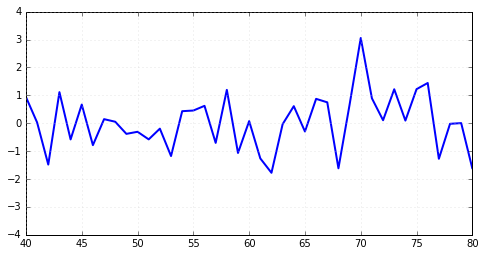

In [28]:
f, ax= plt.subplots(figsize=(8,4)); 
ax.plot(xdf.index, xdf['A'], lw=2, color='b');
ax.set_xlim(40,80)
ax.grid(color='0.8')

### you can connect ```plugins``` to the figure

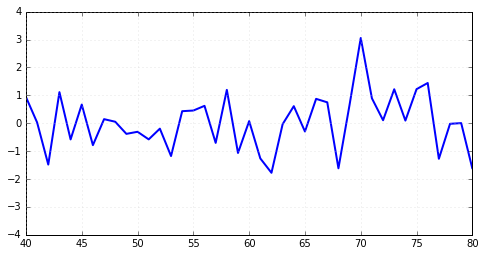

In [29]:
f, ax= plt.subplots(figsize=(8,4)); 
plt.plot(xdf.index, xdf['A'], lw=2, color='b');
ax.set_xlim(40,80)
ax.grid(color='0.8')
plugins.connect(f, plugins.MousePosition(fontsize=16))

In [30]:
mpld3.save_html(f, './mpld3_figure.html')

+ [open in a new tab](./mpld3_figure.html)

+ [some more examples](http://mpld3.github.io/examples/index.html) from the mpld3 gallery

<hr size = 6>

## BOKEH

[bokeh](http://bokeh.pydata.org/) is a library developed by [continuum analytics](http://continuum.io)  

from their website:

*Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. Its goal is to provide elegant, concise construction of novel graphics in the style of D3.js, but also deliver this capability with high-performance interactivity over very large or streaming datasets. Bokeh can help anyone who would like to quickly and easily create interactive plots, dashboards, and data applications.*

To know more about bokeh: 
    
[http://bokeh.pydata.org/](http://bokeh.pydata.org/)

if you use the [anaconda python distribution](), all the bokeh examples are saved in 

    ${anaconda}/Examples/bokeh 

prepare the data: simple sine

In [31]:
x = np.linspace(0, 10, 1000)
y = np.sin(x)

In [32]:
from bokeh.plotting import figure, output_file, output_notebook, show

In [33]:
output_notebook()

BokehJS successfully loaded.

In [34]:
# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend="sin(x)", line_width=2)

# show the results
show(p)

Or you can output to an HTML file

**specify mode = "cdn" so it loads the javascript from the bokeh Content Delivery Network instead of 
the local copy**

In [35]:
output_file("sin.html", title="sin(x)", mode="cdn")

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend="sin(x)", line_width=2)

# show the results
show(p)

### You can control the toolbar: here I want pan, box_zoom, reset, but not save etc 

In [36]:
x = np.array([0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
y0 = x**2
y1 = 10**x
y2 = 10**(x**2)

# output to static HTML file
output_file("log_lines.html")

# create a new plot
p = figure(
   tools="pan,box_zoom,reset",
   y_axis_type="log", y_range=[0.001, 10**11], title="log axis example",
   x_axis_label='sections', y_axis_label='particles'
)

# add some renderers
p.line(x, x, legend="y=x")
p.circle(x, x, legend="y=x", fill_color="white", size=8)
p.line(x, y0, legend="y=x^2", line_width=3)
p.line(x, y1, legend="y=10^x", line_color="red")
p.circle(x, y1, legend="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend="y=10^x^2", line_color="orange", line_dash="4 4")

# show the results
show(p)

<hr size=6> 

## FOLIUM

[folium](https://github.com/wrobstory/folium)  has been also been developed by [Rob Story](http://wrobstory.github.io/) to provide an interface to the [leaflet.js](http://leafletjs.com/) JavaScript mapping library